![](./altis_logo_HD.png)

![](./govhack_logo.png)

# <center> Project: Insolvency, Facts vs Spin <center>

##  <center> Jupyter Notebook 1/2 - Random Forest Classification (Python) <center>

## 1. Import Libraries & Files

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
from copy import copy

In [2]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_dataset = pd.read_csv('non-compliance-in-personal-insolvencies.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_dataset.shape

(356500, 23)

In [6]:
df_dataset.head(2)

,Unique ID,Calendar Year of Insolvency,SA3 of Debtor,SA3 Code of Debtor,GCCSA of Debtor,GCCSA Code of Debtor,State of Debtor,Sex of Debtor,Family Situation,Debtor Occupation Code (ANZSCO),...,Debtor Income,Primary Income Source,Unsecured Debts,Value of Assets,Type of Party,Non-Compliance Type,Result of Non-Compliance,Number of Instances,Outcome of Non-Compliance,Non-Compliance Conviction Result
0,3452750,2010,South Canberra,80106,Australian Capital Territory,8ACTE,Australian Capital Territory,Female,Single with Dependants,39.0,...,$0-$49999,Government benefits/Pensions,$0-$49999,$0-$49999,NaN,NaN,NaN,NaN,NaN,NaN
1,3563908,2011,Weston Creek,80108,Australian Capital Territory,8ACTE,Australian Capital Territory,Male,Couple without Dependants,84.0,...,$0-$49999,Government benefits/Pensions,$0-$49999,$0-$49999,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_dataset.columns

Index(['Unique ID', 'Calendar Year of Insolvency', 'SA3 of Debtor',
       'SA3 Code of Debtor', 'GCCSA of Debtor', 'GCCSA Code of Debtor',
       'State of Debtor', 'Sex of Debtor', 'Family Situation',
       'Debtor Occupation Code (ANZSCO)', 'Debtor Occupation Name (ANZSCO)',
       'Main Cause of Insolvency', 'Business Related Insolvency',
       'Debtor Income', 'Primary Income Source', 'Unsecured Debts',
       'Value of Assets', 'Type of Party', 'Non-Compliance Type',
       'Result of Non-Compliance', 'Number of Instances',
       'Outcome of Non-Compliance', 'Non-Compliance Conviction Result'],
      dtype='object')

## 2. Non-Compliance Classification (Random Forest)

### 2.1 Data Wrangling

We want a simple classification of compliance/non-compliance based on the columns common to all records.

$1.$ Create a new binary valued column __'Compliant (Y/N)'__ based on whether __'Non-Compliance Type'__ is empty/null or contains a value.

In [8]:
df_dataset['Compliant (Y/N)'] = df_dataset['Non-Compliance Type'].isnull()

$2.$ Remove the other non compliant columns so that we are only left with __'Compliant (Y/N)'__ for our target variable.

In [9]:
list_cols_non_compliant = ['Type of Party', 'Non-Compliance Type',
       'Result of Non-Compliance', 'Number of Instances',
       'Outcome of Non-Compliance', 'Non-Compliance Conviction Result']

In [10]:
str_target_var = 'Compliant (Y/N)'

$3.$ Remove unhelpful input columns (eg unique ids, high correlation with other columns, etc)

In [11]:
list_cols_useless = ['Unique ID','SA3 Code of Debtor','GCCSA Code of Debtor','Debtor Occupation Code (ANZSCO)']

In [12]:
# actually remove all chosn columns
df_dataset = df_dataset.drop(list_cols_non_compliant, axis = 1).drop(list_cols_useless, axis = 1)

In [13]:
df_dataset.head(2)

,Calendar Year of Insolvency,SA3 of Debtor,GCCSA of Debtor,State of Debtor,Sex of Debtor,Family Situation,Debtor Occupation Name (ANZSCO),Main Cause of Insolvency,Business Related Insolvency,Debtor Income,Primary Income Source,Unsecured Debts,Value of Assets,Compliant (Y/N)
0,2010,South Canberra,Australian Capital Territory,Australian Capital Territory,Female,Single with Dependants,Other Technicians and Trades Workers,Unemployment or loss of income,No,$0-$49999,Government benefits/Pensions,$0-$49999,$0-$49999,True
1,2011,Weston Creek,Australian Capital Territory,Australian Capital Territory,Male,Couple without Dependants,"Farm, Forestry and Garden Workers",Unemployment or loss of income,No,$0-$49999,Government benefits/Pensions,$0-$49999,$0-$49999,True


$4.$ Select target variable $y$ and matrix of input variables $X$

In [14]:
y_all = (df_dataset[str_target_var])
X_all = df_dataset.drop(str_target_var,axis = 1)

$5.$ Convert categorical columns to matrix using one hot encoding

(NB here all $X$ , $y$ columns are categorical)

In [15]:
# one hot encoding for X_all
one_hot_X_all = pd.get_dummies(X_all)

In [16]:
one_hot_X_all.shape

(356500, 519)

In [17]:
# one hot encoder for y_all
# inspired by: https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
one_hot_y_all = pd.factorize(y_all)[0]

In [18]:
one_hot_X_all.head(3)

,Calendar Year of Insolvency,SA3 of Debtor_Adelaide City,SA3 of Debtor_Adelaide Hills,SA3 of Debtor_Albany,SA3 of Debtor_Albury,SA3 of Debtor_Alice Springs,SA3 of Debtor_Armadale,SA3 of Debtor_Armidale,SA3 of Debtor_Auburn,SA3 of Debtor_Augusta - Margaret River - Busselton,...,Value of Assets_$550000-$599999,Value of Assets_$600000-$649999,Value of Assets_$650000-$699999,Value of Assets_$700000-$749999,Value of Assets_$750000-$799999,Value of Assets_$800000-$849999,Value of Assets_$850000-$899999,Value of Assets_$900000-$949999,Value of Assets_$950000-$999999,Value of Assets_More Than $1000000
0,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


$5.$ Export this one hot encoding of $X$ and $y$ to be used by the neural network

In [21]:
df_export_small_insolvency = copy(one_hot_X_all)

In [22]:
df_export_small_insolvency['y'] = one_hot_y_all

In [25]:
# write one hot encoding to csv for use by Neural Networks
df_export_small_insolvency.to_csv('one_hot_small_insolvency.csv')

### 2.2 Random Forest Classification

The main motivation for using random forests in python is use



```python
classifier_rf.feature_importances_
```

To extract out variable & category importance to obtain some __key indicators of non-compliance__ to explore further. 

These will be explored in a Power BI report.

Note that neural networks will be used for a more powerful classification model so the performance of the random forests is not directly evaluated.

$1.$ Split the data into 5 folds to get a distribution of 5 values for the feature importance values

In [26]:
# create shuffle split object
shuffle_split_object = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

$2.$ For each of the 5 folds, train a random forest classifier and record the feature importances

In [27]:
int_split_counter = 1

df_classifier_scores_RF = pd.DataFrame(index = list(one_hot_X_all.columns))

for train_idx, test_idx in shuffle_split_object.split(one_hot_X_all):
    
    
    X_train, X_test = one_hot_X_all.loc[train_idx,:], one_hot_X_all.loc[test_idx,:]
    y_train, y_test = one_hot_y_all[train_idx], one_hot_y_all[test_idx]
    
    classifier_rf = RandomForestClassifier()
    
    classifier_rf.fit(X_train, y_train)
    
    str_temp_col = 'split-' + str(int_split_counter)
    
    df_classifier_scores_RF[str_temp_col] = list(classifier_rf.feature_importances_)
    #temp_feature_importance = list(classifier_rf.feature_importances_)
    
    
    int_split_counter += 1

### 2.3 Model Results

$1.$ Transform results dataframe

In [28]:
# copy the feature importance results
df_classifier_scores_RF_copy = copy(df_classifier_scores_RF)

In [29]:
df_classifier_scores_RF_new = df_classifier_scores_RF.reset_index()

In [30]:
# rename columns
df_classifier_scores_RF_new[['Cat Var Name','Cat Var Value']] = df_classifier_scores_RF_new['index'].str.split('_', expand = True)

In [32]:
(df_classifier_scores_RF_new).drop('index', axis = 1, inplace = True)

In [31]:
df_classifier_scores_RF_new.head(3)

,index,split-1,split-2,split-3,split-4,split-5,Cat Var Name,Cat Var Value
0,Calendar Year of Insolvency,0.093418,0.093066,0.093945,0.092907,0.096035,Calendar Year of Insolvency,None
1,SA3 of Debtor_Adelaide City,0.000824,0.000934,0.000949,0.000798,0.000941,SA3 of Debtor,Adelaide City
2,SA3 of Debtor_Adelaide Hills,0.000569,0.000682,0.000838,0.000714,0.000706,SA3 of Debtor,Adelaide Hills


$2.$ Create a pivot table to show variable importance boxplots across all 5 splits

In [39]:
pivtab_class_scores = pd.pivot_table(df_classifier_scores_RF_new, values=['split-1','split-2','split-3','split-4','split-5'],
                             index=['Cat Var Name'], aggfunc=np.sum)

In [40]:
pivtab_class_scores.head(2)

,split-1,split-2,split-3,split-4,split-5
Cat Var Name,,,,,
Business Related Insolvency,0.022498,0.020996,0.023005,0.024456,0.026978
Calendar Year of Insolvency,0.093418,0.093066,0.093945,0.092907,0.096035


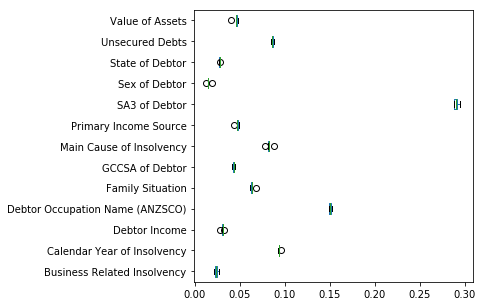

In [41]:
pivtab_class_scores.T.plot(kind = 'box',  figsize = (5,5), vert = False)

See __Power BI report__ for more visualisations...

$3.$ Export variable importance data to csv for use in Power BI

In [37]:
df_classifier_scores_RF_new.head(3)

,split-1,split-2,split-3,split-4,split-5,Cat Var Name,Cat Var Value
0,0.093418,0.093066,0.093945,0.092907,0.096035,Calendar Year of Insolvency,None
1,0.000824,0.000934,0.000949,0.000798,0.000941,SA3 of Debtor,Adelaide City
2,0.000569,0.000682,0.000838,0.000714,0.000706,SA3 of Debtor,Adelaide Hills


In [38]:
df_classifier_scores_RF_new.to_csv('PyRF_dash2_suburbs.csv')